In [7]:
from tslearn.clustering import TimeSeriesKMeans
import pickle
import matplotlib.pyplot as plt

# Carico le serie temporali e resa

In [8]:
with open('./pickles/allPixelNDVIPoly.pickle', 'rb') as handle:
    allPixelNDVIPoly = pickle.load(handle)

with open('./pickles/newResa3.pickle', 'rb') as handle:
    newResa3 = pickle.load(handle)

num_cluster = 5

# filtraggio

In [9]:
allPixelNDVIPoly = allPixelNDVIPoly[(newResa3<=11000) & (newResa3 >= 4000),:]
newResa3 = newResa3[(newResa3<=11000) & (newResa3 >= 4000)]

# k-means su tutta la serie temporale 

In [10]:
# k-means su tutto l'asse temporale 

km_one = TimeSeriesKMeans(n_clusters=num_cluster, metric="euclidean", max_iter=100,
                      random_state=0)
y_pred_one = km_one.fit_predict(allPixelNDVIPoly)

# plot dei cluster

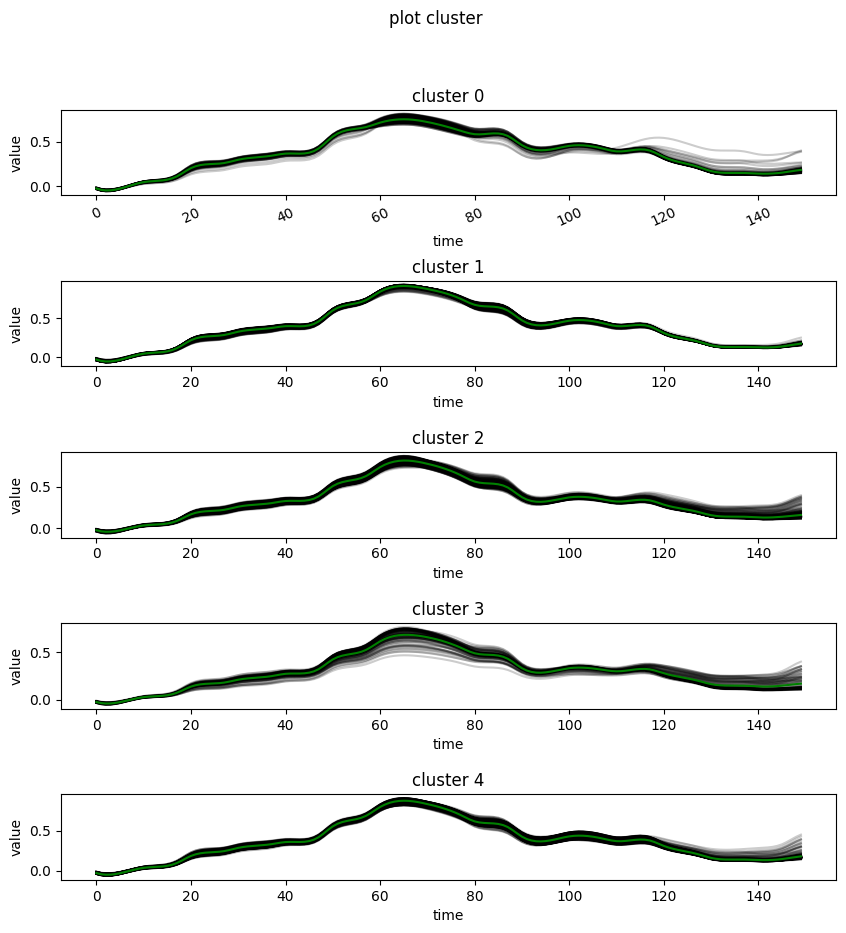

In [11]:
fig, axs = plt.subplots(nrows=num_cluster, ncols=1, figsize=(10, 10))
plt.subplots_adjust(hspace=1)
fig.suptitle('plot cluster')
plt.sca(axs[0])
plt.xticks(rotation=25) # Rotate label

for b in range(0,num_cluster):
    
    for xx in allPixelNDVIPoly[y_pred_one == b]:
        axs[b].plot(xx.ravel(), "k-", alpha=.2)

    axs[b].plot(range(0,150),km_one.cluster_centers_[b].ravel(),color="green")
    axs[b].set_title("cluster "+str(b))
    axs[b].set_xlabel("time")
    axs[b].set_ylabel("value")
    plt.sca(axs[b])

plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_8172\1153446996.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=transparent,color=colors[a])


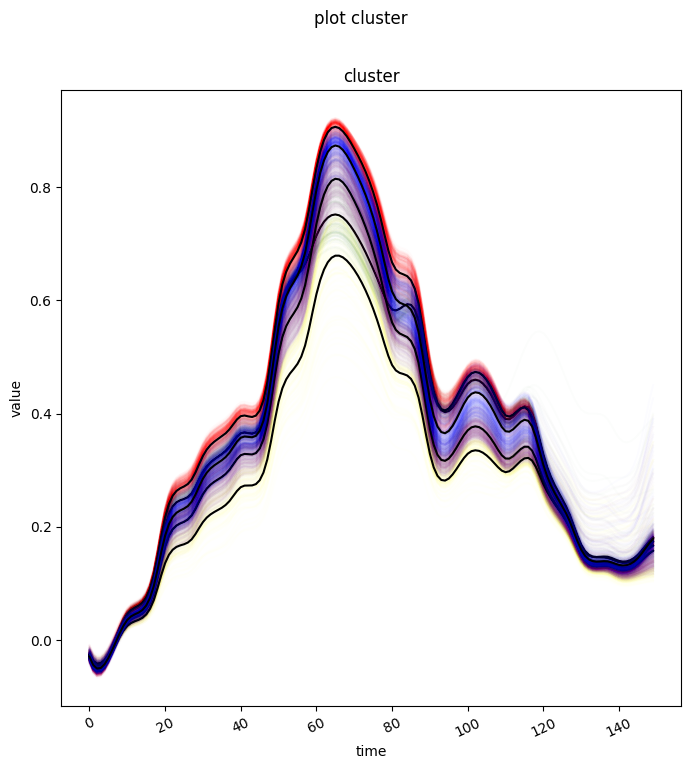

In [12]:
transparent = 0.01

colors = ['green','red','purple','yellow','blue']

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.suptitle('plot cluster')
plt.sca(axs)
plt.xticks(rotation=25) # Rotate label

axs.set_title("cluster")
axs.set_xlabel("time")
axs.set_ylabel("value")

for a in range(0,num_cluster):
    for xx in allPixelNDVIPoly[y_pred_one == a]:
        axs.plot(xx.ravel(), "k-", alpha=transparent,color=colors[a])
    
    axs.plot(range(0,150),km_one.cluster_centers_[a],color="black")


plt.sca(axs)
plt.xticks(rotation=25)
plt.show()